## UDEMY DATA ANALYSIS
### HARITIMA MANCHANDA

#### PROBLEM STATEMENT -
Udemy is an online learning platform that offers a wide range of courses on various topics. It hosts a diverse catalog of courses in areas such as business, technology, and personal development. It is one of the platforms that has drastically changed the landscape of education through online learning. Udemy encompasses a wide range of courses, varying in quality, credibility, pricing, level, and content. Because of these variablities, it is facing the challenge of optimizing course relevance and learner satisfaction in an increasingly competitive online learning market. Therefore this analysis aims at gaining insights into the factors that influence subscriber counts, course popularity, and learner preferences.

#### RESEARCH QUESTIONS -
1. Does number of subscribers depend on: number of reviews, price, number of lectures, content_duration?
2. How does the level of a course (e.g., beginner, intermediate, advanced) impact its popularity? Do certain levels attract more subscribers? 
3. How does the paid vs. free course model impact the number of subscribers? Do paid courses have more or fewer subscribers compared to free courses?
4. Can we identify any differences in the popularity of courses based on their subject categories? Are certain categories more popular than others?
5. What is the trend of number of subscribers in different subject areas over the years?

#### QUESTION JUSTIFICATION -
The research questions related to factors influencing subscriber count on Udemy courses, and the impact of course level, course model, and content category on it can contribute to addressing several societal problems:

1. Access to Education: By understanding the factors that attract more subscribers and make courses popular, educational platforms and course creators can tailor their offerings to meet the needs of a diverse range of learners. This can enhance access to education by providing courses that cater to different levels, preferences, and learning styles, ensuring that education is more inclusive and accessible to a larger population.

2. Quality of Education: Analyzing the relationship between subscriber count and factors like reviews, content duration, and number of lectures can help improve the quality of online education. By identifying the factors that contribute to successful courses and high subscriber engagement, course creators and platforms can focus on creating more effective, engaging, and well-structured courses, ultimately enhancing the overall quality of online education.

3. Affordability and Pricing Strategies: Investigating the impact of price and course models (paid vs. free) on subscriber count can help address issues related to the affordability of education. Understanding whether paid or free courses attract more subscribers can inform pricing strategies, allowing course creators and platforms to strike a balance between revenue generation and affordability, ensuring that education remains accessible to a wider audience.

4. Alignment with Market Demands: Analyzing the popularity of courses based on content categories can help address societal needs and align educational offerings with market demands. Identifying the most popular categories can inform resource allocation and course development, ensuring that educational resources are available in areas that are in high demand, such as technology, business, or other relevant fields.

5. Analyzing the trend of the number of subscribers in different subjects over the years in the Udemy dataset can help educational institutions, policymakers, and content creators allocate their resources effectively. They can identify the subjects that have shown consistent growth in popularity and invest more in developing high-quality courses and educational materials in those areas. Conversely, subjects that have seen a decline in subscriber numbers can be assessed to determine if changes are needed to make them more appealing or if resources should be reallocated to more popular subjects.

Therefore, by gaining insights into the factors that influence subscriber counts, course popularity, and learner preferences, Udemy can address the problem of aligning course offerings with learner needs, improving course quality, and refining pricing strategies, ultimately enhancing learner satisfaction and maintaining a competitive edge in the online learning industry.

#### DATASET
The [dataset](https://www.kaggle.com/datasets/andrewmvd/udemy-courses?resource=download) can be found here. This dataset contains 3.682 records of courses from 4 subjects (Business Finance, Graphic Design, Musical Instruments and Web Design) taken from Udemy.

#### ANALYSIS:
Lets begin by cleaning our dataset to get the required columns. Also, I noticed that I was repeating a lot of code, so I am creating some helper functions.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [10]:
# Helper functions
def generate_pie_chart(data, labels, colors, title):
    plt.pie(data, labels=labels, autopct='%1.1f%%', colors=colors)
    plt.title(title)
    plt.show()

def generate_strip_plot(x, y, data, color, x_label, y_label, title):
    plt.figure(figsize=(8, 4))
    sns.stripplot(x=x, y=y, data=data, c=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.yscale('log')
    plt.title(title)
    plt.show()

def conduct_kruskal_wallis(*groups):
    statistic, p_value = stats.kruskal(*groups)
    return p_value

def interpret_kruskal_results(p_value, alpha=0.05):
    if p_value < alpha:
        print("Reject the null hypothesis.")
    else:
        print("Accept the null hypothesis.")

In [2]:
df = pd.read_csv('udemy_courses.csv')
df = df.drop(['course_id', 'url', 'published_timestamp'], axis=1)
df.head(5)

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,Business Finance
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,Business Finance
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,Business Finance
4,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,Business Finance


### QUESTION 1 ANALYSIS:

In [3]:
corr_df = df.drop(['course_title', 'is_paid', 'level', 'subject'], axis=1)
print("Correlation Matrix: \n")
corr_df.corr()

Correlation Matrix: 



,price,num_subscribers,num_reviews,num_lectures,content_duration
price,1.000000,0.050769,0.113696,0.330160,0.293450
num_subscribers,0.050769,1.000000,0.649946,0.157746,0.161839
num_reviews,0.113696,0.649946,1.000000,0.243029,0.228889
num_lectures,0.330160,0.157746,0.243029,1.000000,0.801647
content_duration,0.293450,0.161839,0.228889,0.801647,1.000000


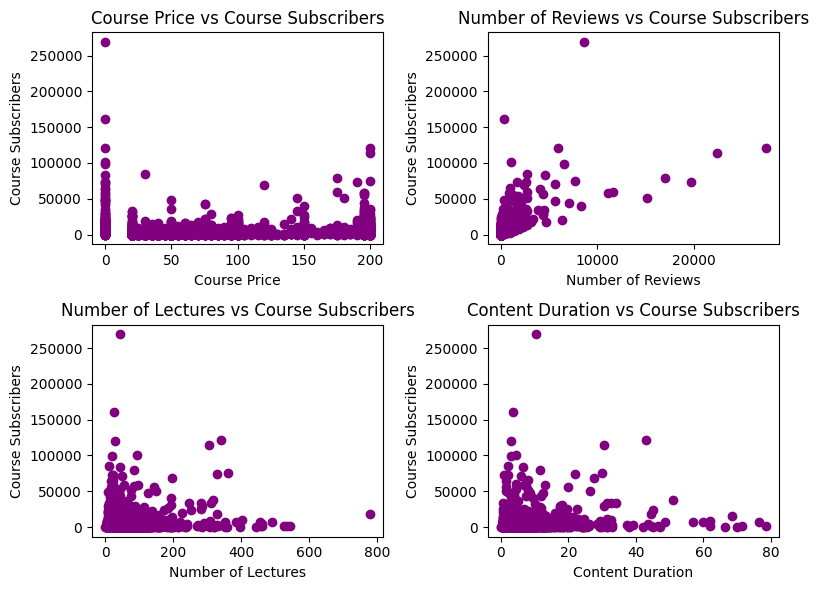

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

# Scatter plot 1
axes[0, 0].scatter(df['price'], df['num_subscribers'], c='purple')
axes[0, 0].set_xlabel('Course Price')
axes[0, 0].set_ylabel('Course Subscribers')
axes[0, 0].set_title('Course Price vs Course Subscribers')

# Scatter plot 2
axes[0, 1].scatter(df['num_reviews'], df['num_subscribers'], c='purple')
axes[0, 1].set_xlabel('Number of Reviews')
axes[0, 1].set_ylabel('Course Subscribers')
axes[0, 1].set_title('Number of Reviews vs Course Subscribers')

# Scatter plot 3
axes[1, 0].scatter(df['num_lectures'], df['num_subscribers'], c='purple')
axes[1, 0].set_xlabel('Number of Lectures')
axes[1, 0].set_ylabel('Course Subscribers')
axes[1, 0].set_title('Number of Lectures vs Course Subscribers')

# Scatter plot 4
axes[1, 1].scatter(df['content_duration'], df['num_subscribers'], c='purple')
axes[1, 1].set_xlabel('Content Duration')
axes[1, 1].set_ylabel('Course Subscribers')
axes[1, 1].set_title('Content Duration vs Course Subscribers')

plt.tight_layout()
plt.show()

A correlation coefficient of 0.649946 (from the correlation matrix) indicates a moderate positive correlation between the number of reviews and the number of subscribers. The scatter plot also shows a positive relationship, it further supports the conclusion of a positive association between these two variables.Other factors such as price, number of lectures and content duration are not so important when making considerations about the courses to choose. It's essential to recognize that accessibility and affordability are multifaceted. Learners consider various aspects when deciding to enroll in a course, including their perceived value, the reputation of the course or platform, and the relevance of the course content to their learning goals.

### QUESTION 2 ANALYSIS:

Number of subscribers in each course level: 
 level
All Levels            6915076
Beginner Level        4051843
Expert Level            50196
Intermediate Level     742005
Name: num_subscribers, dtype: int64


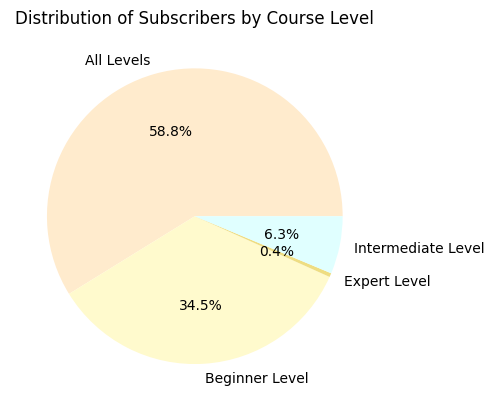

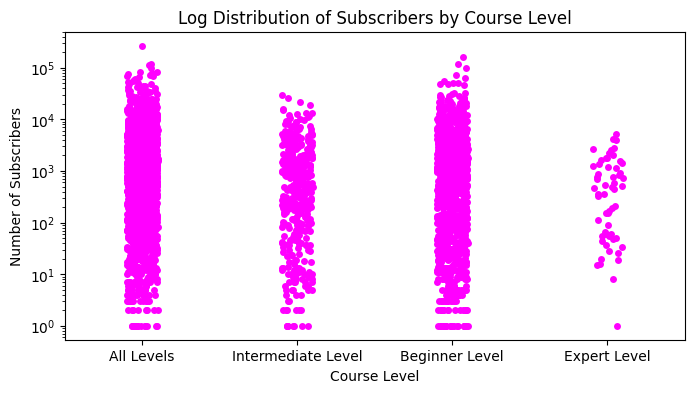

In [7]:
# Number of subscribers in each course level
df_subscribers_by_level = df.groupby('level')['num_subscribers'].sum()
print("Number of subscribers in each course level: \n", df_subscribers_by_level)

colors = ['#FFEBCD', '#FFFACD', '#EEDD82', '#E0FFFF', '#F0FFF0']
generate_pie_chart(df_subscribers_by_level, df_subscribers_by_level.index, colors, 'Distribution of Subscribers by Course Level')

generate_strip_plot('level', 'num_subscribers', df, 'magenta', 'Course Level', 'Number of Subscribers', 'Log Distribution of Subscribers by Course Level')


In [11]:
# Grouping by level and conducting Kruskal-Wallis test.

# Kruskal-Wallis test: a non-parametric test suitable for comparing multiple independent groups with unequal sample sizes.

# Null Hypothesis (H₀): The level of a course does not have an impact on its popularity. 
# There is no significant difference in the number of subscribers among different course levels.

# Alternative Hypothesis (H₁): The level of a course does have an impact on its popularity. 
# There is a significant difference in the number of subscribers among different course levels.

all_levels_group = df[df['level'] == 'All Levels']['num_subscribers']
beginner_group = df[df['level'] == 'Beginner Level']['num_subscribers']
intermediate_group = df[df['level'] == 'Intermediate Level']['num_subscribers']
expert_group = df[df['level'] == 'Expert Level']['num_subscribers']

p_value = conduct_kruskal_wallis(all_levels_group, beginner_group, intermediate_group, expert_group)

print("Results from Kruskal-Wallis Test (p_value = ", p_value, ")")
interpret_kruskal_results(p_value)



Results from Kruskal-Wallis Test (p_value =  3.397318671539073e-07 )
Reject the null hypothesis.


Results from Kruskal-Wallis Test and the swarm plot confirm that there are differences in subscriber count between the course levels. All levels, beginner level, and intermediate level courses have subscriber counts in all ranges, while the expert level courses have a more widespread subscriber count.

### QUESTION 3 ANALYSIS:

Number of paid and unpaid courses: 
 is_paid
False     310
True     3368
Name: course_title, dtype: int64


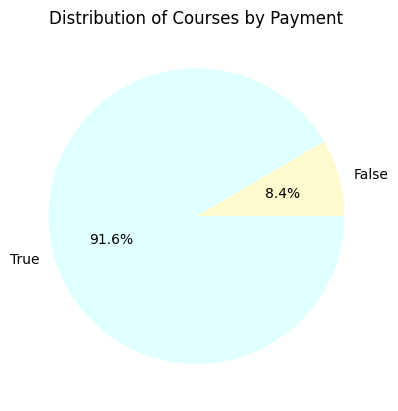

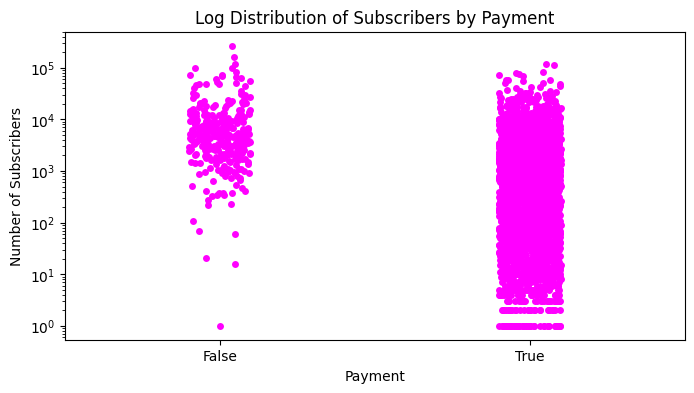

Results from Kruskal-Wallis Test (p_value =  4.06638138400913e-80 )
Reject the null hypothesis.


In [12]:
# Number of paid and unpaid courses
df_is_paid = df.groupby('is_paid')['course_title'].count()
print("Number of paid and unpaid courses: \n", df_is_paid)

colors = ['#FFFACD', '#E0FFFF']
generate_pie_chart(df_is_paid, df_is_paid.index, colors, 'Distribution of Courses by Payment')

generate_strip_plot('is_paid', 'num_subscribers', df, 'magenta', 'Payment', 'Number of Subscribers', 'Log Distribution of Subscribers by Payment')

# Grouping by payment status and conducting Kruskal-Wallis test
is_paid_true_group = df[df['is_paid'] == True]['num_subscribers']
is_paid_false_group = df[df['is_paid'] == False]['num_subscribers']

p_value = conduct_kruskal_wallis(is_paid_true_group, is_paid_false_group)

print("Results from Kruskal-Wallis Test (p_value = ", p_value, ")")
interpret_kruskal_results(p_value)

 Based on the observations, free courses are less in number but have subscriber count in higher ranges whereas paid courses have subscriber count in all ranges.

### QUESTION 4 ANALYSIS:

Number of subscribers in each subject: 
 subject
Business Finance       1868711
Graphic Design         1063148
Musical Instruments     846689
Web Development        7980572
Name: num_subscribers, dtype: int64


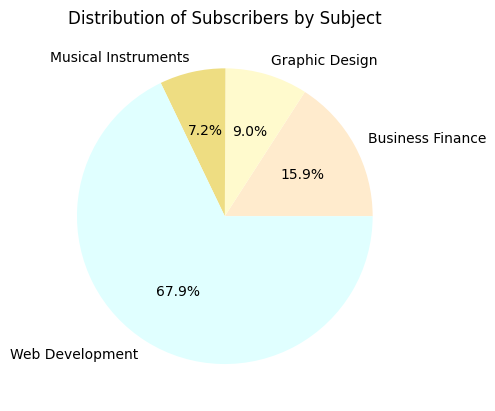

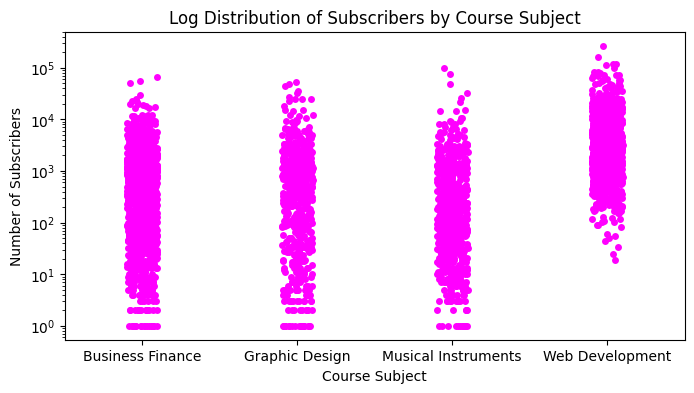

level                All Levels  Beginner Level  Expert Level  \
subject                                                         
Business Finance        1047208          647007         30146   
Graphic Design           688332          315757          1008   
Musical Instruments      328170          429030          5431   
Web Development         4851366         2660049         13611   

level                Intermediate Level  
subject                                  
Business Finance                 144350  
Graphic Design                    58051  
Musical Instruments               84058  
Web Development                  455546   




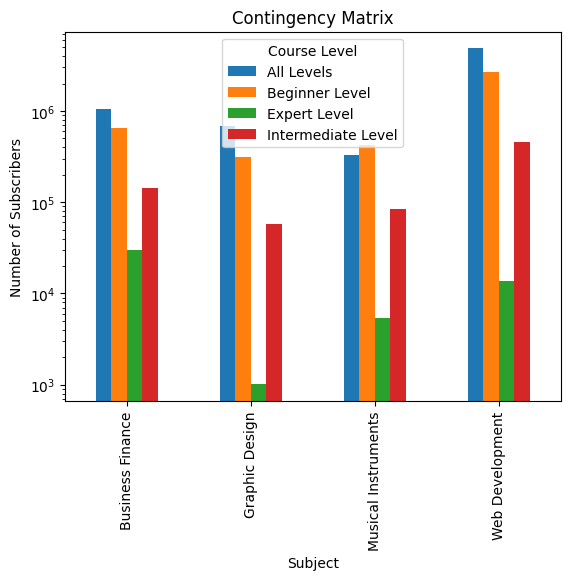

Results from chi squared test: p-value =  0.0
There is a significant difference among the course levels for each subject.


In [15]:
df_subscribers_by_subject = df.groupby('subject')['num_subscribers'].sum()
print("Number of subscribers in each subject: \n", df_subscribers_by_subject)

colors = ['#FFEBCD', '#FFFACD', '#EEDD82', '#E0FFFF', '#F0FFF0']
generate_pie_chart(df_subscribers_by_subject, df_subscribers_by_subject.index, colors, 'Distribution of Subscribers by Subject')

generate_strip_plot('subject', 'num_subscribers', df, 'magenta', 'Course Subject', 'Number of Subscribers', 'Log Distribution of Subscribers by Course Subject')

# Checking does level and subject combined are related.
# Using a chi-squared test to determine if there is a significant difference among the course levels 
# for each subject based on the number of subscribers.

contingency_matrix = pd.crosstab(index=df['subject'], columns=df['level'], values=df['num_subscribers'], aggfunc='sum')

print(contingency_matrix, "\n\n")

contingency_matrix.plot(kind='bar')
plt.xlabel('Subject')
plt.ylabel('Number of Subscribers')
plt.yscale('log')
plt.title('Contingency Matrix')
plt.legend(title='Course Level')
plt.show()

chi2, p, dof, expected = chi2_contingency(contingency_matrix)

print("Results from chi squared test: p-value = ", p)

alpha = 0.05
if p < alpha:
    print("There is a significant difference among the course levels for each subject.")
else:
    print("There is no significant difference among the course levels for each subject.")

### QUESTION 5 ANALYSIS:

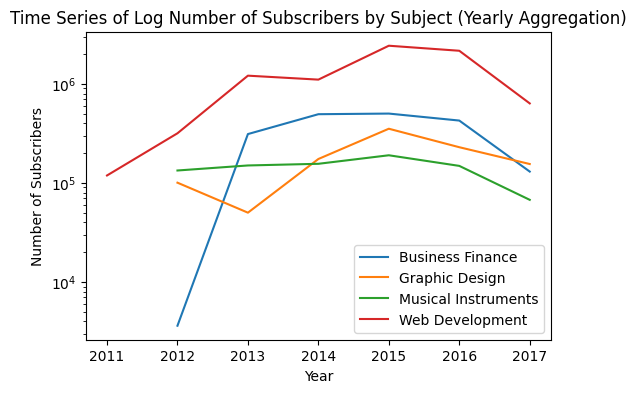

In [16]:
# How subscribers have changed over time
df = pd.read_csv('udemy_courses.csv')
df = df.drop(['course_id', 'url'], axis=1)
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])
grouped_data = df.groupby(['subject', df['published_timestamp'].dt.year])['num_subscribers'].sum().reset_index()

fig, ax = plt.subplots(figsize=(6,4))

for subject, data in grouped_data.groupby('subject'):
    ax.plot(data['published_timestamp'], data['num_subscribers'], label=subject)

ax.set_xlabel('Year')
ax.set_ylabel('Number of Subscribers')
ax.set_yscale('log')
ax.set_title('Time Series of Log Number of Subscribers by Subject (Yearly Aggregation)')
ax.legend()
plt.show()

### OBSERVATIONS AND CONCLUSIONS -

#### QUESTION 1:
1. There is a moderate positive relationship between the number of reviews and the number of subscribers in the analyzed Udemy dataset. We can draw several conclusions:

2. Reviews influence subscriber behavior: The moderate positive relationship suggests that reviews have an impact on the decision-making process of potential subscribers. Positive reviews might serve as social proof, indicating that the course is valuable and worth enrolling in. Consequently, the more reviews a course has, the more likely it is to attract new subscribers.

#### QUESTION 2: 
Results from the Kruskal-Wallis Test indicate that there are statistically significant differences in subscriber count between the course levels, and the swarm plot visually confirms these differences. We can draw the following conclusions:

1. Subscriber Count Differences: There are significant differences in the number of subscribers across the different course levels. This suggests that the course level has an impact on the popularity or attractiveness of the courses to learners.

2. All Levels and Beginner/Intermediate Levels: Courses categorized as "All Levels," "Beginner Level," and "Intermediate Level" have subscriber counts distributed across a wide range. This indicates that there is interest in courses at these levels, and the subscriber count is not concentrated within a specific range. These levels may cater to a broader audience or target learners at different stages of their learning journey.

3. Expert Level Courses: In contrast to the other levels, "Expert Level" courses exhibit a widespread subscriber count distribution. This suggests that the demand or interest in expert-level courses may vary significantly. It is possible that expert-level courses attract a more specialized or niche audience, resulting in a wider range of subscriber counts.

Overall, these findings indicate that course level plays a role in the popularity and subscriber count of online courses. The results highlight the importance of offering courses at different levels to cater to learners with varying skill levels and interests.

#### QUESTION 3:
Based on the observation that free courses are less in number but have subscriber counts in higher ranges, while paid courses have subscriber counts in all ranges, we can draw the following conclusions:

1. Demand for Free Courses: Despite being fewer in number (only 8.4%), free courses tend to attract a higher number of subscribers. This suggests that there is a significant demand for free educational content. The higher ranges of subscriber counts indicate that free courses can potentially reach a large audience and have the potential to garner widespread interest.

2. Accessibility and Affordability: The availability of free courses may contribute to their popularity, as they are more accessible and affordable for learners. The absence of a financial barrier encourages more learners to enroll, resulting in higher subscriber counts.

3. Paid Courses Appeal to a Varied Audience: Paid courses, on the other hand, demonstrate subscriber counts across all ranges. This suggests that there is a market for paid courses catering to different topics, levels, and specialized areas of interest. Paid courses may attract learners who are willing to invest in their education or seek more comprehensive and advanced learning experiences.

4. Range of Subscriber Counts: The fact that paid courses have subscriber counts in all ranges implies that there is variability in their popularity and demand. Some paid courses may have a higher subscriber count due to their perceived value, reputation, or unique offering, while others may have fewer subscribers due to their niche focus or higher price point.

Overall, these findings suggest that while free courses tend to attract a larger number of subscribers, paid courses can still be successful in terms of subscriber count by catering to different interests and offering valuable content. The availability of both free and paid courses allows for a diverse range of learning options, accommodating learners with different preferences, budgets, and educational goals.

#### QUESTION 4:

1. Web Development: Web Development courses have the highest number of subscribers across all course levels except for the Expert level. This suggests that Web Development is a popular subject among learners of different skill levels, ranging from beginners to more advanced learners.

2. Business Finance: Business Finance courses have the highest number of subscribers in the Expert level and are ranked second in the other course levels. This indicates that Business Finance courses tend to attract more advanced learners who are specifically seeking to enhance their knowledge and skills in this subject. It is also a popular subject overall.

3. Graphic Design: Graphic Design courses are popular among learners, but they do not attract as many subscribers in the Expert level. This suggests that Graphic Design courses are more favored by learners at beginner to intermediate levels rather than advanced learners.

4. Musical Instruments: Similarly to Graphic Design, Musical Instruments courses are also popular but not as much in the Expert category. This implies that learners are more inclined to take Musical Instruments courses at beginner to intermediate levels rather than advanced levels.

Overall, Web Development appears to be the most popular subject across all course levels, except for the Expert level. Business Finance, Graphic Design, and Musical Instruments also have a considerable number of subscribers, indicating their popularity among learners at different skill levels, but they are less prevalent among advanced learners compared to Web Development and Business Finance in the Expert category.

#### QUESTION 5:
The trends in subscribers for different subjects highlight varying patterns of popularity and fluctuations over the years. Web Development and Business Finance initially showed growth but experienced declines in 2017. Graphic Design saw a mix of fluctuations with periods of growth and decline. Musical Instruments remained relatively constant until a decrease in 2017. These trends could be influenced by factors such as market saturation, changes in learner preferences, shifts in industry demand, or external factors impacting the educational landscape. However, we will need more information to comment on these.

### RESULTS -
Number of reviews, course level, paid or free price model and subject areas affect the number of subscribers in courses on Udemy. However, from this data analysis I can confidently conclude that there is always room to explore and ask more questions regarding what are the factors that people think of before enrolling in a course on udemy. If we had more information on type of reviews, course/instructor ratings, we could provide more concrete results. 